<a href="https://colab.research.google.com/github/Aparajithashri/Learn/blob/Aparajithashri%2FAction/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LINEAR REGRESSION

##Predict the grade using linear regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
mark='/content/drive/My Drive/Colab Notebooks/marksheet.csv'

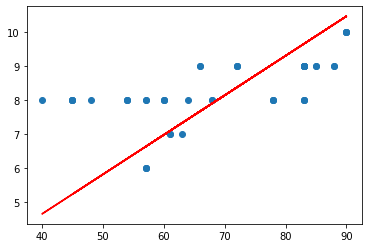

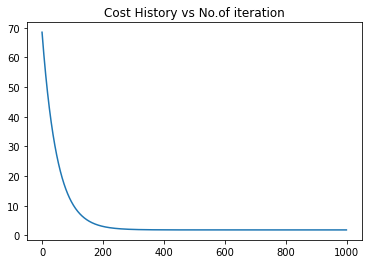

In [168]:
data= pd.read_csv(mark)
#print(data)
data.columns=['x','y']
X=data.iloc[:,data.columns!='y']
Y=data.iloc[:,data.columns=='y']

mean_x=float(np.mean(X))
mean_y=float(np.mean(Y))

#cost function
def cost_function(weight, bias):
    total_error = 0.0
    for i in X.index:
        total_error += (float(Y['y'][i]) - (weight*float(X['x'][i]) + bias))**2
    return total_error / len(X)

def update_weights(weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0

    for i in X.index:
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*float(X['x'][i]) * (float(Y['y'][i]) - (weight*float(X['x'][i]) + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(float(Y['y'][i]) - (weight*float(X['x'][i]) + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / len(X)) * learning_rate
    bias -= (bias_deriv / len(X)) * learning_rate

    return weight, bias

def train( weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights( weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(weight, bias)
        cost_history.append(cost)

        # Log Progress
        #if i % 10 == 0:
            #print ("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias, cost_history

weight, bias, cost_history=train(0,0,0.000001,1000)
Y_pred=[]
for i in X.index:
  y=(weight*float(X['x'][i])+bias)
  Y_pred.append(y)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.plot()
plt.show()
plt.title("Cost History vs No.of iteration")
plt.plot(range(1000),cost_history)

##Using least square

0.040149396667305125 5.52188469641831


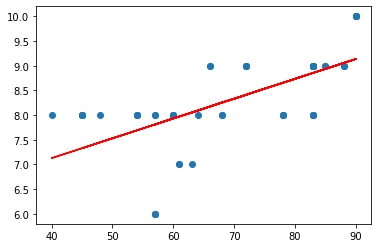

In [150]:
num = 0
den = 0
   
for i in range(len(X)):
    num += (X['x'][i] - mean_x)*(Y['y'][i] - mean_y)
    den += (X['x'][i] - mean_x)**2
m = num / den
c = mean_y - m*mean_x
print(m,c)

Y_pred = m*X + c

plt.scatter(X, Y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot(X,Y_pred, color='red') # predicted
plt.show()

In [126]:
 import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Train data


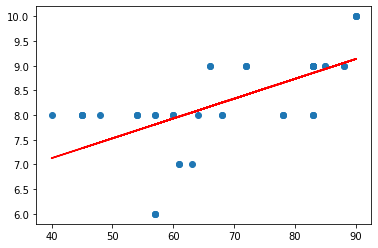

Test data
Actual Grade
    y
29  9
4   8
26  8
30  8
32  9
37  6
34  8
40  8
7   9
10  8
Predicted Grade
[[9.]
 [8.]
 [8.]
 [9.]
 [9.]
 [8.]
 [9.]
 [8.]
 [8.]
 [8.]]


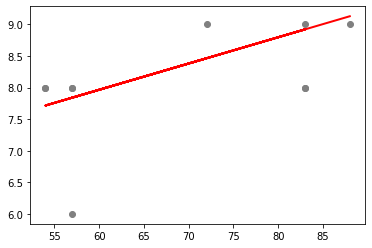

Mean Absolute Error: 0.5314562733880778
Mean Squared Error: 0.5604384721760381
Root Mean Squared Error: 0.7486243865758303


In [154]:
data= pd.read_csv(mark)
data.columns=['x','y']
X=data.iloc[:,data.columns!='y']
Y=data.iloc[:,data.columns=='y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)
model =LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
#Train data
print("Train data")
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.plot()
plt.show()
print("Test data")
print("Actual Grade")
print(Y_test)
print("Predicted Grade")
print (np.round(y_pred))
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))